<a href="https://colab.research.google.com/github/hnipun/ColabProjects/blob/master/project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.utils import to_categorical

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

%matplotlib inline

IMAGE_SIZE = 28
TRAIN_IMAGES = 60000
TEST_IMAGES = 10000 


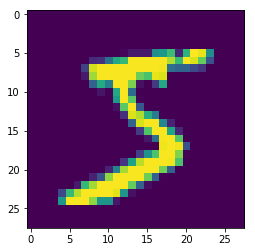

In [6]:
def show_image(image):
    image = np.asarray(image).squeeze()
    plt.imshow(image)
    plt.show()

def process_images(image_file, label_file, num_images):
    count = {}
    for i in range(0,11):
      count[i] = 0
    image_res = []
    label_res = []
    
    
    f = gzip.open(image_file,'r')
    f.read(16)
    buf = f.read(IMAGE_SIZE * IMAGE_SIZE * num_images)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
    data = data.reshape(num_images, IMAGE_SIZE, IMAGE_SIZE, 1)
    
    f = gzip.open(label_file,'r')
    f.read(8)
    for index in range(0, num_images):   
        buf = f.read(1)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
        
        if not count[labels[0]] >= num_images//100:
          image_res.append(data[index])
          label_res.append(to_categorical(labels[0], num_classes = 10))
          count[labels[0]]+=1
        else:
          continue
        
    return np.array(image_res),  np.array(label_res)
#%%
train_images, train_labels = process_images('/content/train-images-idx3-ubyte.gz', '/content/train-labels-idx1-ubyte.gz', TRAIN_IMAGES)
test_images, test_labels  = process_images('/content/t10k-images-idx3-ubyte.gz', '/content/t10k-labels-idx1-ubyte.gz', TEST_IMAGES)
#%%
show_image(train_images[0])
#%%

In [0]:
 def model(kernel_size=3, feature_maps=[6,16]):
  # create model
  model = Sequential()

  # add model layers
  model.add(Conv2D(feature_maps[0], kernel_size=kernel_size, activation='sigmoid', strides=(1, 1), input_shape=(28,28,1)))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
  model.add(Conv2D(feature_maps[1], kernel_size=kernel_size, activation='sigmoid'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
  model.add(Flatten())
  model.add(Dense(120, activation='relu'))
  model.add(Dense(84, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  
  #summary
  model.summary()

  #compile model using accuracy to measure model performance
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  #train the model
  history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=15)
  
  return history

In [32]:
# baseline model
history_1 = model()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 25, 25, 6)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 23, 23, 16)        880       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 22, 22, 16)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 7744)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 120)               929400    
_________________________________________________________________
dense_32 (Dense)             (None, 84)              

In [33]:
# change the kernel size
history_2 = model(kernel_size=5)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 23, 23, 6)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 19, 19, 16)        2416      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 18, 18, 16)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 5184)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 120)               622200    
_________________________________________________________________
dense_35 (Dense)             (None, 84)              

In [34]:
# change the number of feature maps
history_3 = model(feature_maps=[12,32])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 12)        120       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 25, 25, 12)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 23, 23, 32)        3488      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 15488)             0         
_________________________________________________________________
dense_37 (Dense)             (None, 120)               1858680   
_________________________________________________________________
dense_38 (Dense)             (None, 84)              

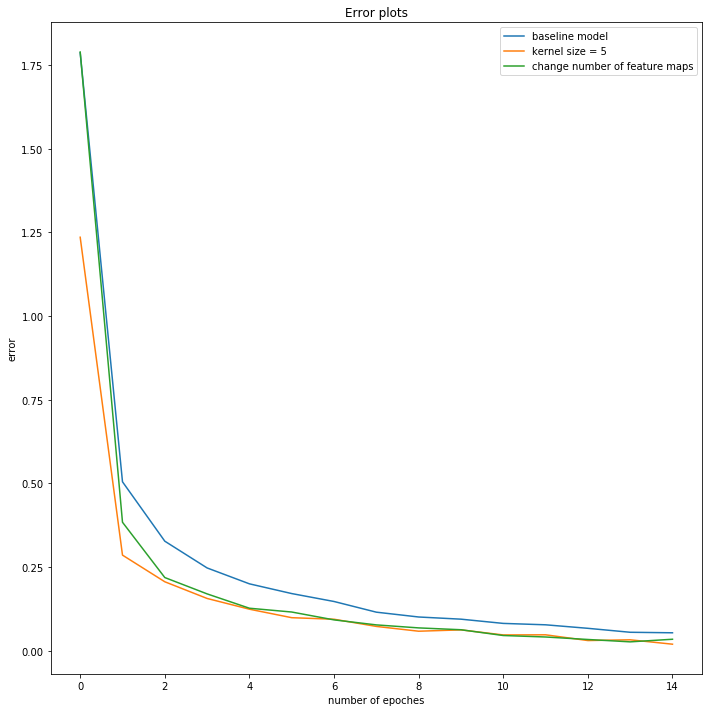

In [35]:
plt.figure(figsize=(10,10))

plt.plot(history_1.history['loss'], label = "baseline model") 
plt.plot(history_2.history['loss'], label = "kernel size = 5") 
plt.plot(history_3.history['loss'], label = "change number of feature maps") 

plt.xlabel('number of epoches') 
plt.ylabel('error') 
plt.title('Error plots') 
plt.legend()

plt.tight_layout()
plt.show() 